# Parameter tuning for SVC

This notebook was basically inspired by:  
- [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)
- [SVM Hyperparameter Tuning using GridSearchCV](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/):

The goal of this notebook is to show the basic steps in machine learnign and the influence of choosing the "right" the kernel of a **support vector classifier (SVC)**. Furthermore, the SVC parameters are described and their effect on the classification result is shown.  

## Load globally used libraries and set plot parameters

In [1]:
import time

from IPython.display import HTML

## STEP 0: Get the data

Since this is intended to be an introduction to the world of machine learning (ML), this step does NOT deal with the design of an application suitable for ML and the acquisition of valid measurement data.

In order to get to know the typical work steps and ML tools, the use of **well-known and well-researched data sets** is clearly **recommended**.

In the further course, the famous [Iris flower data sets](https://en.wikipedia.org/wiki/Iris_flower_data_set) will be used.
It can be downloaded on [Iris Flower Dataset | Kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset). Furthermore, the dataset is included in Python in the machine learning package [Scikit-learn](https://scikit-learn.org), so that users can access it without having to find a special source for it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

# import some data to play with
irisdata_df = pd.read_csv('./datasets/IRIS_flower_dataset_kaggle.csv')

## STEP 1: Exploring the data

The objectives of the exploration of the dataset are as follows:

1. Clarify the **origins history**:
    - Where did the data come from? => Contact persons and licensing permissions?
    - Who obtained the data and with which (measurement) methods? => Did systematic errors occur during the acquisition?
    - What were they originally intended for? => Can they be used for my application?

2. Overview of the internal **structure and organisation** of the data:
    - Which columns are there? => With which methods can they be read in (e.g. import of CSV files)?
    - What do they contain for (physical) measured variables? => Which technical or physical correlations exist?
    - Which data formats or types are there? => Do they have to be converted?
    - In which value ranges do the measurement data vary? => Are normalizations necessary?

3. Identify **anomalies** in the data sets:
    - Do the data have gaps or duplications? => Does the data set need to be cleaned?
    - Are there obvious erroneous entries or measurement outliers? => Does (statistical) filtering have to be carried out?

4. Avoidance of **tendencies due to bias**:
    - Are all possible classes included in the dataset and equally distributed? => Does the data set need to be enriched with additional data for balance?

5. Find a first rough **idea of which correlations** could be in the data set

### Clarify the **origins history**

> The ***Iris* flower data sets** is a multivariate data set introduced by the British statistician and biologist *Ronald Fisher* in his paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis" (1936). It is sometimes called *Anderson's Iris data set* because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species (source: [Iris flower data set](https://en.wikipedia.org/w/index.php?title=Iris_flower_data_set&oldid=1090001619)).

The dataset is published in Public Domain with a [CC0-License](https://creativecommons.org/share-your-work/public-domain/cc0/).

This dataset became a typical test case for many statistical classification techniques in machine learning such as **support vector machines**.

> [..] measurements of the flowers of fifty plants each of the two species *Iris setosa* and *I. versicolor*, found **growing together in the same colony** and measured by Dr E. Anderson [..] (source: R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". [Annals of Eugenics](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x))

> [..] *Iris virginica*, differs from the two other samples in **not being taken from the same natural colony** [..] (source: ibidem)

### Overview of the internal **structure and organisation** of the data

The data set consists of 50 samples from each of three species of Iris ([*Iris setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*Iris virginica*](https://en.wikipedia.org/wiki/Iris_virginica) and [*Iris versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor)), so there are 150 total samples. Four features were measured from each sample: the length and the width of the [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal), in centimetres.  
Here is a principle illustration of a flower with sepal and petal:

In [21]:
display(HTML("<figure><img src='./images/Mature_flower_diagram.svg' width='800px'> \
                 <figcaption>Principle illustration of a flower with sepal and petal (source: <a href='https://en.wikipedia.org/wiki/File:Mature_flower_diagram.svg'>Mature_flower_diagram.svg</a>)</figcaption> \
              </figure>"))

Here are pictures of the three different Iris species (*Iris setosa*, *Iris virginica* and *Iris versicolor*). Given the dimensions of the flower, it will be possible to predict the class of the flower.

In [22]:
display(HTML("<table> \
                <tr> \
                <td><figure><img src='./images/Iris_setosa_640px.jpg' width='320px'> \
                        <figcaption><i>Iris setosa</i> (source: <a href='https://commons.wikimedia.org/wiki/File:Irissetosa1.jpg'>Irissetosa1.jpg</a>)</figcaption> \
                    </figure></td> \
                <td><figure><img src='./images/Iris_versicolor_640px.jpg' width='320px'> \
                        <figcaption><i>Iris versicolor</i> (source: <a href='https://en.wikipedia.org/wiki/File:Iris_versicolor_3.jpg'>Iris versicolor 3.jpg</a>)</figcaption> \
                    </figure></td> \
                <td><figure><img src='./images/Iris_virginica_590px.jpg' width='295px'> \
                        <figcaption><i>Iris virginica</i> (source: <a href='https://en.wikipedia.org/wiki/File:Iris_virginica.jpg'>Iris virginica.jpg</a>)</figcaption> \
                    </figure></td> \
                </tr> \
              </table>"))

Iris setosa (source: Irissetosa1.jpg),Iris versicolor (source: Iris versicolor 3.jpg),Iris virginica (source: Iris virginica.jpg)


#### Inspect **structure of dataframe**

In [3]:
irisdata_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
irisdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
irisdata_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualise data with **scatter plot** and **pair plot**

In the following, [Seaborn](https://seaborn.pydata.org/) is applied which is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. 

To investigate whether there are dependencies in `irisdata_df` between individual variables in the data set, it is advisable to plot them in a **scatter plot**.

In [21]:
import seaborn as sns

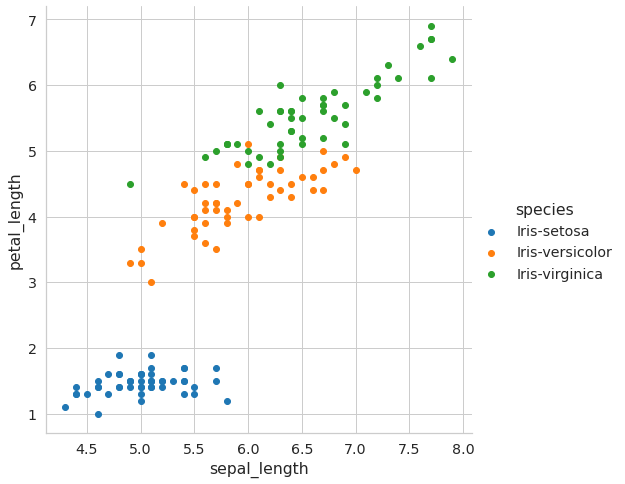

In [36]:
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
sns.set_style("whitegrid")
# set scale of fonts
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

# 'sepal_length', 'petal_length' are iris feature data
# 'height' used to define height of graph
# 'hue' stores the class/label of iris dataset
sns.FacetGrid(irisdata_df, hue ="species",
              height = 7).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

With this **[pairs plot](https://vita.had.co.nz/papers/gpp.pdf)** it is possible to see both **distribution** of single variables and **relationships** between two variables.

This function will create a grid of Axes such that **each numeric variable** in `irisdata_df` will by shared in the y-axis across a single row and in the x-axis across a single column.

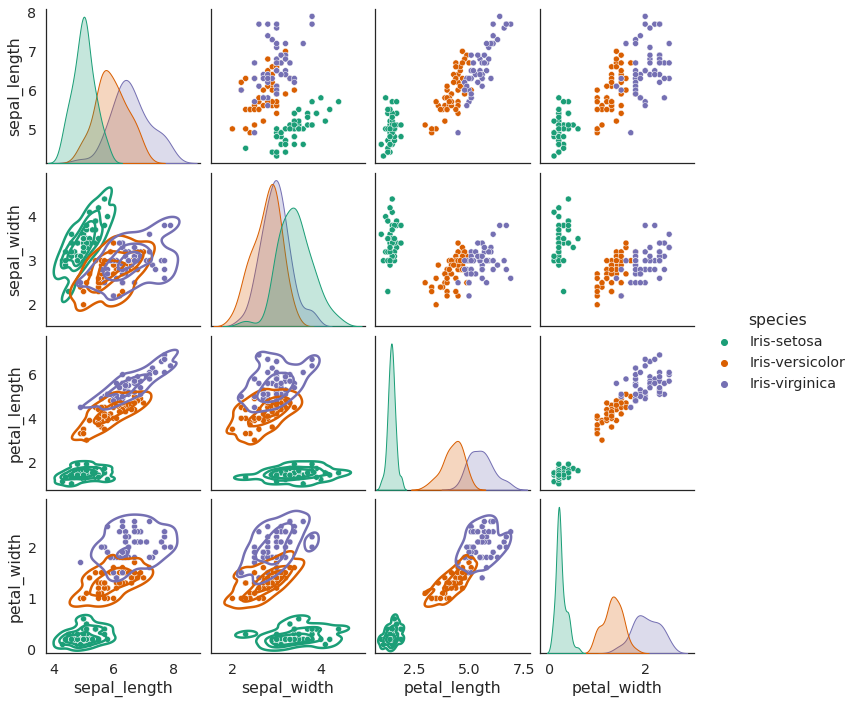

In [38]:
sns.set_style("white")
g = sns.pairplot(irisdata_df, diag_kind="kde", hue='species', palette='Dark2')
g.map_lower(sns.kdeplot, levels=4, color=".2")

### Identify **anomalies** in the data sets

### Avoidance of **tendencies due to bias**

### Find a first rough **idea of which correlations** could be in the data set

## STEP 2: Preparation of the data

## STEP 3: Classification by support vector classifier (SVC)

### Operating principal

> Support Vectors Classifier tries to **find the best hyperplane to separate** the different classes by maximizing the distance between sample points and the hyperplane (source: [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)).

### Vary parameters

## STEP 4: Evaluation (metrics)